>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Smartphone Price Prediction </h1>
</div>


# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > TABLE OF CONTENTS<br><div>  
* [LIBRARY IMPORTS](#1)
* [LOAD DATA](#2)
* [Statastical Summary](#3)
* [Encoding](#4) 
* [EDA](#5)
* [Feature Scaling](#6) 
* [Splitting data](#7) 
* [Training and evalution of model](#8) 
* [Splitting data](#7)
* [Model comparison](#8) 
* [Conclusion](#9) 
   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-price/Mobile phone price.csv


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [3]:
df = pd.read_csv('/kaggle/input/mobile-phone-price/Mobile phone price.csv')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing data
</div>

In [5]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [6]:
df.shape

(407, 8)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [7]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Battery Capacity (mAh),407.000000,4676.476658,797.193713,1821.000000,4300.000000,5000.000000,5000.000000,7000.000000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [8]:
drop_col=['Model','Camera (MP)','Screen Size (inches)']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Brand,Storage,RAM,Price ($)
0,Apple,128 GB,6 GB,999
1,Samsung,256 GB,12 GB,1199
2,OnePlus,128 GB,8 GB,899
3,Xiaomi,128 GB,6 GB,279
4,Google,128 GB,8 GB,799
...,...,...,...,...
402,Samsung,128,8,1049
403,Xiaomi,128,6,349
404,Apple,128,6,1099
405,Oppo,128,8,429


In [9]:
df[object_columns]

,Brand,Storage,RAM,Price ($)
0,Apple,128 GB,6 GB,999
1,Samsung,256 GB,12 GB,1199
2,OnePlus,128 GB,8 GB,899
3,Xiaomi,128 GB,6 GB,279
4,Google,128 GB,8 GB,799
...,...,...,...,...
402,Samsung,128,8,1049
403,Xiaomi,128,6,349
404,Apple,128,6,1099
405,Oppo,128,8,429


In [10]:
df['Price ($)'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '1999', '119', '319',
       '1049'], dtype=object)

In [11]:
df['Price ($)'] = df['Price ($)'].str.replace('$', '').str.replace(',', '').str.strip()
df['Price ($)'] = pd.to_numeric(df['Price ($)'])
df['Price ($)'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049])

In [12]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Brand':
['Apple' 'Samsung' 'OnePlus' 'Xiaomi' 'Google' 'Oppo' 'Vivo' 'Realme'
 'Motorola' 'Nokia' 'Sony' 'LG' 'Asus' 'Blackberry' 'CAT' 'Huawei']

Unique values in 'Storage ':
['128 GB' '256 GB' '64 GB' '32 GB' '128GB' '256GB' '64GB' '32GB' '256'
 '64' '128' '512' '32']

Unique values in 'RAM ':
['6 GB' '12 GB' '8 GB' '4 GB' '3 GB' '2 GB' '4GB' '8GB' '6GB' '12GB' '3GB'
 '2GB' '5GB' '12' '3' '6' '8' '4' '16' '2']

Unique values in 'Price ($)':
[ 999 1199  899  279  799  249  699  329  449  199  299  379  179  729
  599  139  189  399  259  159  229  499  129  529  369 1099  169   99
  459  239 1299  429  659  269  359  549  319  349  969  149  219  109
  389  309  849  469  209  119  339  289  130  749  649  419 1399 1999
 1049]



In [13]:
# Remove 'GB' and convert to integers for 'Storage ' column
df['Storage '] = df['Storage '].str.replace('GB', '').str.strip()
df['Storage '] = pd.to_numeric(df['Storage '])

# Remove 'GB' and convert to integers for 'RAM ' column
df['RAM '] = df['RAM '].str.replace('GB', '').str.strip()
df['RAM '] = pd.to_numeric(df['RAM '])

# Check the result
print(df['Storage '].unique())
print(df['RAM '].unique())

[128 256  64  32 512]
[ 6 12  8  4  3  2  5 16]


In [14]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Brand
0,Apple
1,Samsung
2,OnePlus
3,Xiaomi
4,Google
...,...
402,Samsung
403,Xiaomi
404,Apple
405,Oppo


# One-Hot encoding

In [15]:
df1 = pd.get_dummies(df, columns=object_columns)

In [16]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128,6,3095,999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,256,12,5000,1199,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,128,8,4500,899,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,128,6,5020,279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,128,8,4614,799,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128,8,4300,1049,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,128,6,4160,349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,128,6,3687,1099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,128,8,4025,429,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [17]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128,6,3095,999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,256,12,5000,1199,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,128,8,4500,899,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,128,6,5020,279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,128,8,4614,799,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128,8,4300,1049,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,128,6,4160,349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,128,6,3687,1099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,128,8,4025,429,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Storage                 407 non-null    int64
 1   RAM                     407 non-null    int64
 2   Battery Capacity (mAh)  407 non-null    int64
 3   Price ($)               407 non-null    int64
 4   Brand_Apple             407 non-null    bool 
 5   Brand_Asus              407 non-null    bool 
 6   Brand_Blackberry        407 non-null    bool 
 7   Brand_CAT               407 non-null    bool 
 8   Brand_Google            407 non-null    bool 
 9   Brand_Huawei            407 non-null    bool 
 10  Brand_LG                407 non-null    bool 
 11  Brand_Motorola          407 non-null    bool 
 12  Brand_Nokia             407 non-null    bool 
 13  Brand_OnePlus           407 non-null    bool 
 14  Brand_Oppo              407 non-null    bool 
 15  Brand_Realme           

In [19]:
df1.shape

(407, 20)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA
</div>

<Axes: >

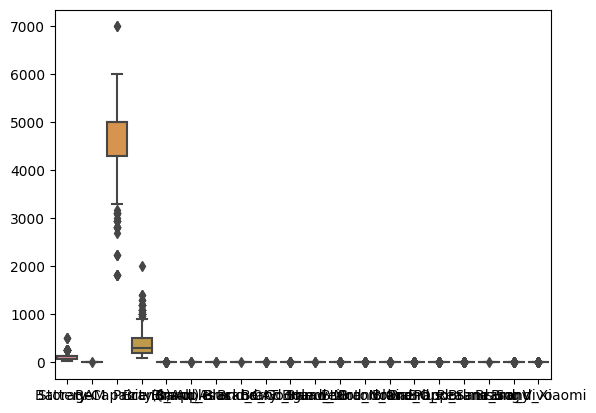

In [20]:
sns.boxplot(df1)

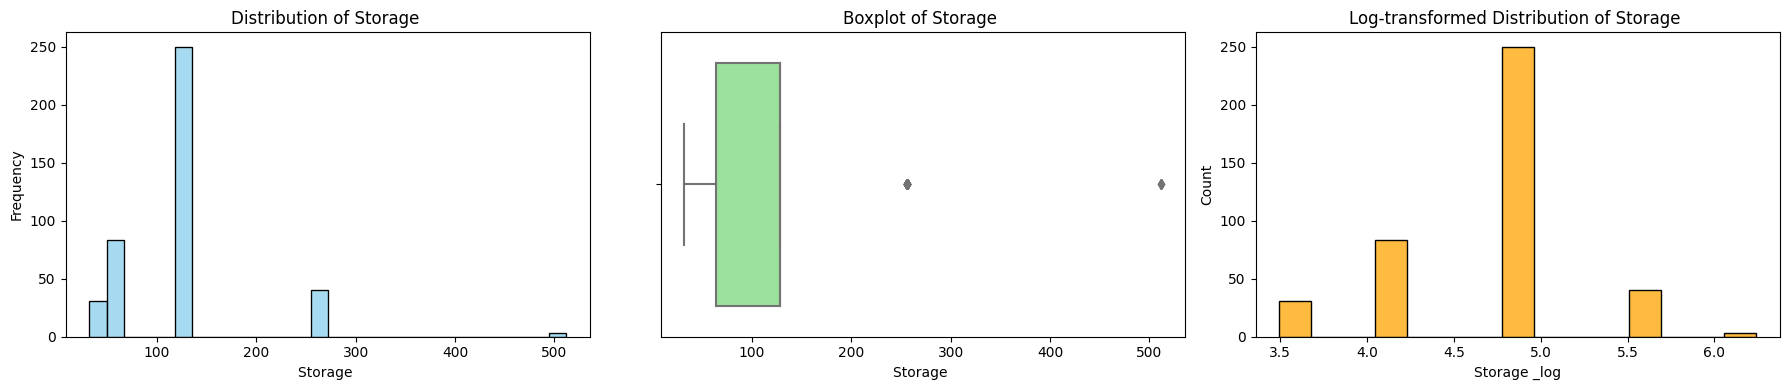

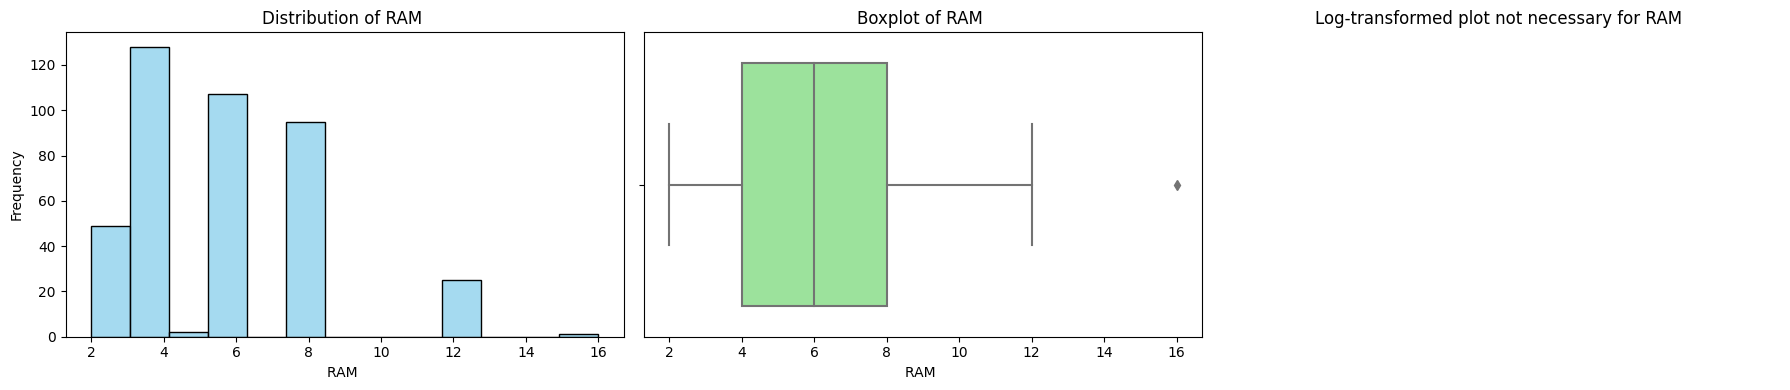

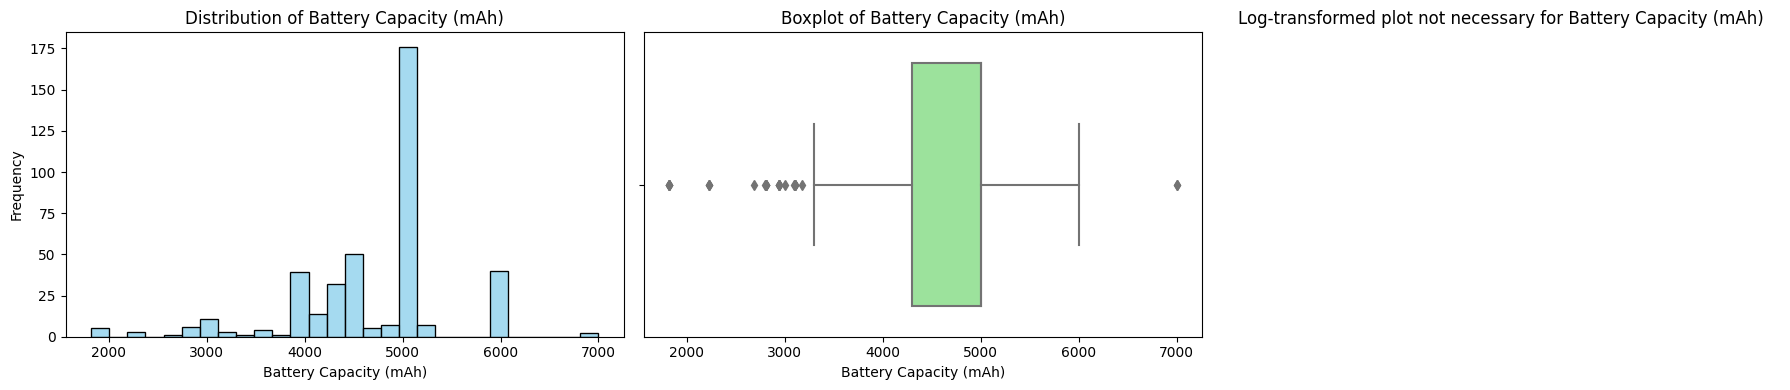

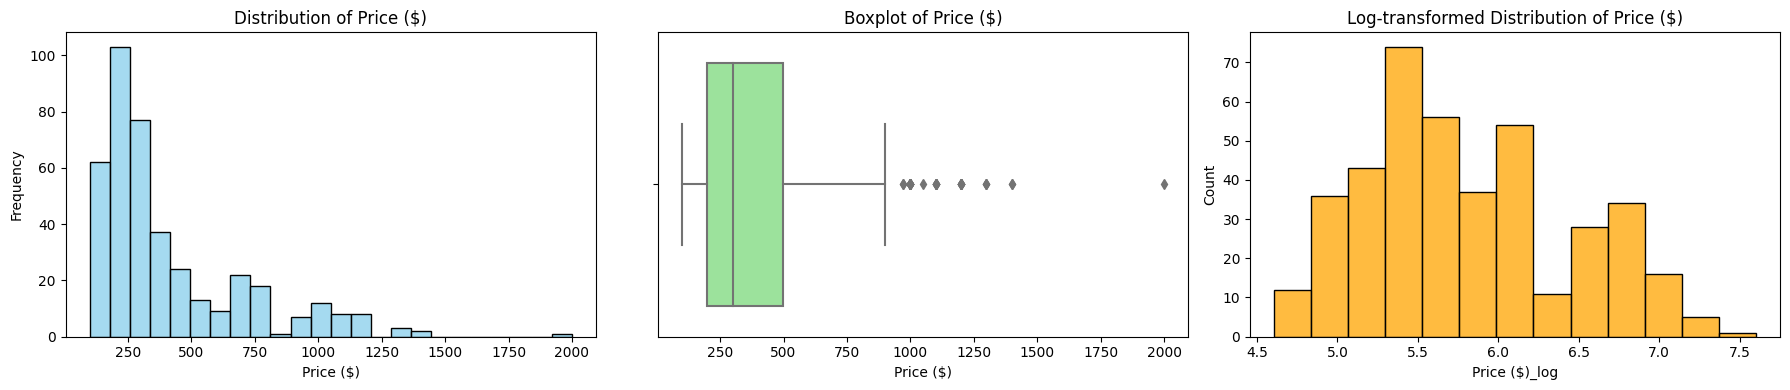

In [21]:
non_boolean_numerical_features = ['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)']

# Get all boolean columns
boolean_columns = df1.select_dtypes(include=['bool']).columns.tolist()

# Filter out non-boolean numerical features
boolean_features_except_numerical = [col for col in boolean_columns if col not in non_boolean_numerical_features]

# Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
for column in non_boolean_numerical_features:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram for the distribution
    sns.histplot(df1[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot for the variable
    sns.boxplot(x=df1[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    # Log transformation and plot if the data is skewed
    if df1[column].skew() > 1:
        df1[column+'_log'] = np.log1p(df1[column])
        sns.histplot(df1[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 15px;"> we can not consider these outlier for above feature. </h1>
</div>

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [22]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [23]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,...,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi,Storage _log,Price ($)_log
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.859812,6.907755
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,5.549076,7.090077
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,4.859812,6.802395
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.634790
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,4.859812,6.684612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,4.859812,6.956545
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.857933
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.859812,7.003065
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,4.859812,6.063785


For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable. Algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

if you're using algorithms that are sensitive to the scale of the target variable, such as Support Vector Machines (SVM) with a regression (SVR) or NuSVR kernel, you might consider scaling the target variable

In [24]:
y_scaled = df1['Price ($)']
y_scaled

0      0.473684
1      0.578947
2      0.421053
3      0.094737
4      0.368421
         ...   
402    0.500000
403    0.131579
404    0.526316
405    0.173684
406    0.289474
Name: Price ($), Length: 407, dtype: float64

In [25]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,...,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi,Storage _log,Price ($)_log
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.859812,6.907755
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,5.549076,7.090077
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,4.859812,6.802395
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.634790
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,4.859812,6.684612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,4.859812,6.956545
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.857933
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.859812,7.003065
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,4.859812,6.063785


In [26]:
x = df1.drop(['Price ($)'],axis=1)
x

,Storage,RAM,Battery Capacity (mAh),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,...,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi,Storage _log,Price ($)_log
0,0.200000,0.285714,0.245993,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.859812,6.907755
1,0.466667,0.714286,0.613825,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,5.549076,7.090077
2,0.200000,0.428571,0.517281,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,4.859812,6.802395
3,0.200000,0.285714,0.617687,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.634790
4,0.200000,0.428571,0.539293,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,4.859812,6.684612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,4.859812,6.956545
403,0.200000,0.285714,0.451632,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.857933
404,0.200000,0.285714,0.360301,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.859812,7.003065
405,0.200000,0.428571,0.425565,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,4.859812,6.063785


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [28]:
X_train

,Storage,RAM,Battery Capacity (mAh),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,...,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi,Storage _log,Price ($)_log
331,0.200000,0.285714,0.644719,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.521461
3,0.200000,0.285714,0.617687,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.859812,5.634790
18,0.200000,0.285714,0.613825,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,4.859812,5.703782
131,0.066667,0.142857,0.613825,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,4.174387,5.010635
118,0.066667,0.142857,0.613825,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.174387,5.521461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.200000,0.142857,0.613825,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,4.859812,5.480639
106,0.000000,0.071429,0.613825,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,3.496508,4.941642
270,0.000000,0.071429,0.613825,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,3.496508,4.875197
348,0.200000,0.142857,0.613825,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,4.859812,5.521461


In [29]:
y_train

331    0.078947
3      0.094737
18     0.105263
131    0.026316
118    0.078947
         ...   
71     0.073684
106    0.021053
270    0.016316
348    0.078947
102    0.473684
Name: Price ($), Length: 325, dtype: float64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> LinearRegression </h1>
</div>


In [30]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)



LinearRegression()

In [31]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)



In [32]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0014026082628148461
Testing MSE: 0.0014405235475605774
Training R2 Score: 0.9431192113491829
Testing R2 Score: 0.9430940108487701


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

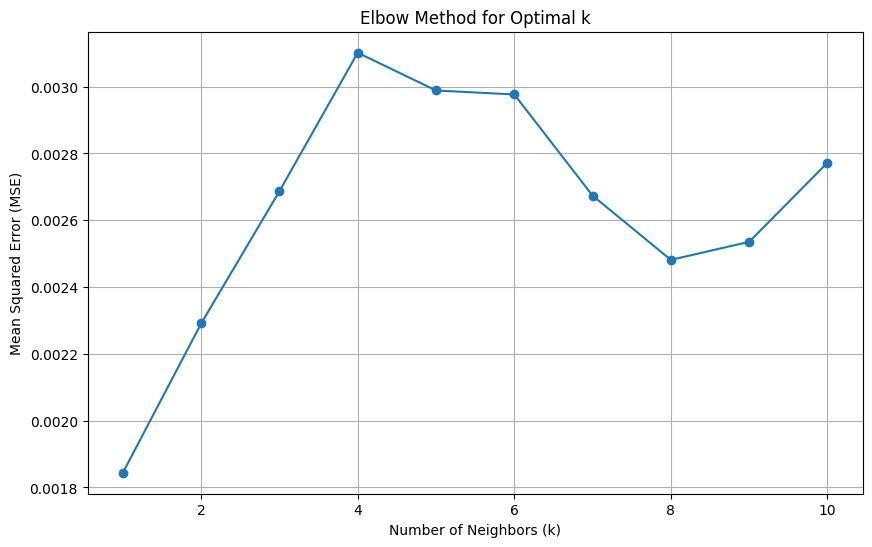

In [33]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [34]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")



Optimal number of neighbors (k): 1


In [35]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=1)

In [36]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [37]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0
Testing MSE: 0.0018441321532328895
Training R2 Score: 1.0
Testing R2 Score: 0.9271499834327477


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTreeRegressor </h1>
</div>

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=5)

In [40]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [41]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")



Training MSE: 1.6253933800677982e-05
Testing MSE: 4.5141032569494445e-05
Training R2 Score: 0.9993408447691551
Testing R2 Score: 0.9982167628470738


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForestRegressor </h1>
</div>

In [42]:

from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(n_estimators=200)

In [44]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 6.372685544427894e-05
Testing MSE: 3.202020209783018e-05
Training R2 Score: 0.9974156477670874
Testing R2 Score: 0.9987350840072798


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> XGBRegressor </h1>
</div>

In [45]:

from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 1.2155075642454254e-08
Testing MSE: 8.840447578323127e-06
Training R2 Score: 0.999999507068148
Testing R2 Score: 0.9996507697393521


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [48]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.402608e-03,0.001441,0.943119,0.943094
1,Decision Tree,1.004817e-33,0.000018,1.000000,0.999293
2,Random Forest,6.165650e-05,0.000030,0.997500,0.998824
3,XGBoost,1.233666e-07,0.000009,0.999995,0.999657


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Best Performer: Both Random Forest and XGBoost exhibit outstanding performance with high R² scores and low MSE values. XGBoost slightly outperforms Random Forest in both metrics, making it the best performer among the models.
        
Overfitting Issue: The Decision Tree model suffers from overfitting, as evidenced by the perfect training score and significantly different training and testing MSE.
        
Reliable Option: Linear Regression, although not as strong as the ensemble methods, shows reliable performance without overfitting, making it a solid choice for simpler and more interpretable models.
        
For the best balance of performance and generalization, XGBoost is the top choice, closely followed by Random Forest. Linear Regression is suitable for scenarios where model interpretability is crucial.</h1>
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  IF you like this Notebook checkout below Dataset which has better features(columns) , good amount of data and also my work on it </h1>
</div>


### Dataset link: https://www.kaggle.com/datasets/pruthvikmachhi/mobile-dataset-cleaned/data

### Notebook link : https://www.kaggle.com/code/pruthvikmachhi/smartphone-price-prediction


### Notebook link :https://www.kaggle.com/code/pruthvikmachhi/mobilephone-eda-price-prediction

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">if you like my notebook give upvote , it will encourage me.
        thanks for exploring my notebook.</h1>
</div>